### Simple UMAP example
This notebook shows you how to run a UMAP projection on the MNIST dataset, as well as plot the loss, and save the model.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'

In [2]:
# allocate GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.set_soft_device_placement(True)
tf.config.run_functions_eagerly(True)
tf.executing_eagerly()

2024-05-16 17:17:28.009727: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 17:17:28.437044: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 17:17:30.932156: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### load data

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.
#train_images = train_images[:1000]

### create parametric umap model

In [5]:
from umap.parametric_umap import ParametricUMAP

/n/groups/datta/tim_sainburg/conda_envs/parametricumap_tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
embedder = ParametricUMAP(n_epochs = 50, verbose=True)

2024-05-16 17:17:42.848893: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43137 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:ca:00.0, compute capability: 8.6


In [7]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP()
Thu May 16 17:17:43 2024 Construct fuzzy simplicial set
Thu May 16 17:17:43 2024 Finding Nearest Neighbors
Thu May 16 17:17:43 2024 Building RP forest with 17 trees
Thu May 16 17:17:48 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May 16 17:17:59 2024 Finished Nearest Neighbor Search
Thu May 16 17:18:02 2024 Construct embedding


/n/groups/datta/tim_sainburg/conda_envs/parametricumap_tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10


/n/groups/datta/tim_sainburg/conda_envs/parametricumap_tf/lib/python3.10/site-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'umap_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in a

1905/1905 ━━━━━━━━━━━━━━━━━━━━ 124s 47ms/step - loss: 0.2292
Epoch 2/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - loss: 0.1880
Epoch 3/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - loss: 0.1831
Epoch 4/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - loss: 0.1810
Epoch 5/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - loss: 0.1801
Epoch 6/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - loss: 0.1794
Epoch 7/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - loss: 0.1790
Epoch 8/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - loss: 0.1789
Epoch 9/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - loss: 0.1786
Epoch 10/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - loss: 0.1783
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Thu May 16 17:33:51 2024 Finished embedding


### plot results

In [8]:
import matplotlib.pyplot as plt

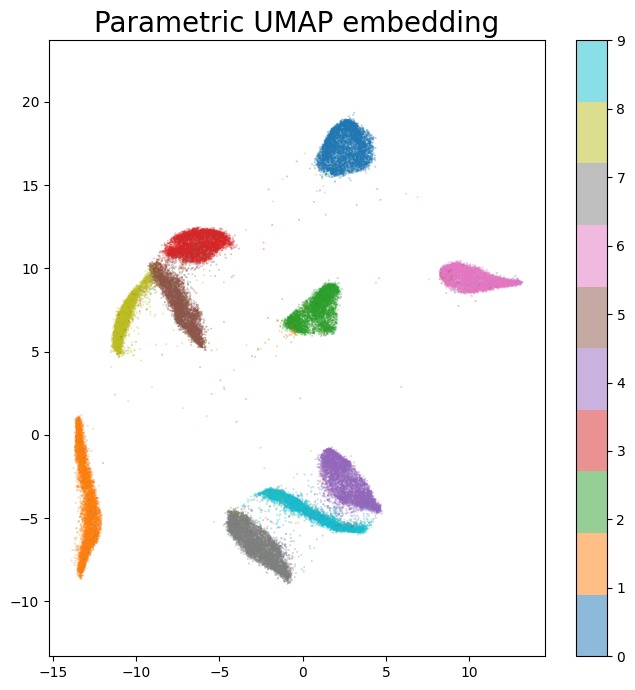

In [9]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("Parametric UMAP embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [10]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

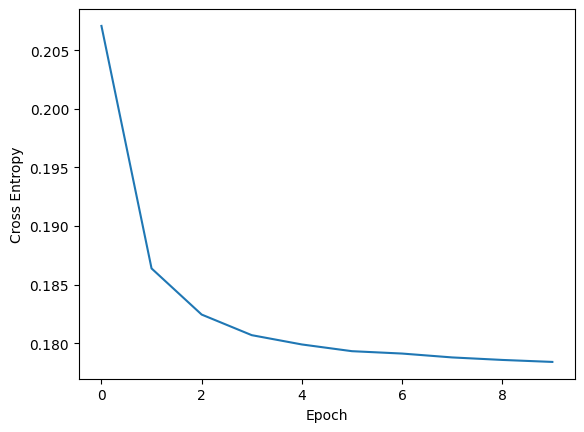

In [11]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

### saving and loading

In [12]:
import os
import tempfile
import shutil

In [13]:
from umap.parametric_umap import load_ParametricUMAP

In [14]:
# Create a temporary directory
tmpdir = tempfile.mkdtemp()
# Define the model save path
model_save_path = os.path.join(tmpdir, 'model')
os.makedirs(model_save_path)

In [15]:
embedder.save(model_save_path)

Keras encoder model saved to /tmp/tmpe7rbbn0g/model/encoder.keras
Keras full model saved to /tmp/tmpe7rbbn0g/model/parametric_model.keras
Thu May 16 17:33:59 2024 Worst tree score: 0.60201667
Thu May 16 17:33:59 2024 Mean tree score: 0.60879216
Thu May 16 17:33:59 2024 Best tree score: 0.61820000
Thu May 16 17:34:01 2024 Forward diversification reduced edges from 900000 to 384327
Thu May 16 17:34:04 2024 Reverse diversification reduced edges from 384327 to 384327
Thu May 16 17:34:06 2024 Degree pruning reduced edges from 421196 to 421193
Thu May 16 17:34:06 2024 Resorting data and graph based on tree order
Thu May 16 17:34:06 2024 Building and compiling search function
Thu May 16 17:34:15 2024 Building and compiling search function
Pickle of ParametricUMAP model saved to /tmp/tmpe7rbbn0g/model/model.pkl


In [16]:
embedder = load_ParametricUMAP(model_save_path)

Thu May 16 17:34:19 2024 Building and compiling search function
Pickle of ParametricUMAP model loaded from /tmp/tmpe7rbbn0g/model/model.pkl
Keras encoder model loaded from /tmp/tmpe7rbbn0g/model/encoder.keras


In [17]:
test = embedder.transform(train_images)

/n/groups/datta/tim_sainburg/conda_envs/parametricumap_tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [18]:
# Clean up the temporary directory
shutil.rmtree(tmpdir)